In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_analytics_lib as dal

In [2]:
x = [1.0,2.0,4.0,6.0,5.0,6.0,9.0,8.0,11.0,12.0]
y = [14.0,10.0,12.0,9.0,8.0,6.0,4.0,3.0,3.0,10.0]

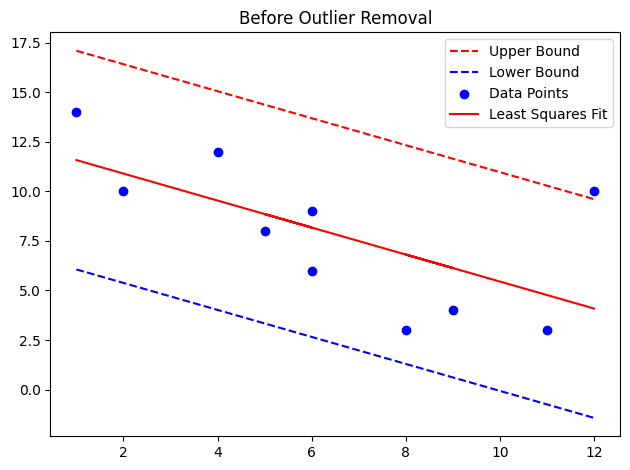

In [ ]:
# def calculate_residuals(x_data, y_data, fit_type = 1):
    
    
#     x_array = np.array(x_data)
#     y_array = np.array(y_data)
    
#     least_square_line_y_values = []
    
#     fit_residual = []
    
#     if fit_type == 1:
#         least_squares_coefficients = dal.least_squares_coefficient(x_array, y_array)
        
#         for x in x_array:
#             least_square_line_y_values.append((least_squares_coefficients[0][0] * x) + least_squares_coefficients[0][1])
        
#         for y in y_array:
#             fit_residual.append(y - least_square_line_y_values[len(fit_residual)])
    
#         residual_mean = np.mean(fit_residual)
#         residual_std = np.std(fit_residual)
        
#     return fit_residual, residual_mean, residual_std

# def determine_outliers(residuals, mean, std_dev, n = 2):
#     outlier_indices = []
#     bound1 = mean + n * std_dev
#     bound2 = mean - n * std_dev
    
#     for i in range(len(residuals)):
#         if residuals[i] > bound1 or residuals[i] < bound2:
#             outlier_indices.append(i)
    
#     return outlier_indices 

# def remove_outliers(x_data, y_data, outlier_indices):
#     x_cleaned = []
#     y_cleaned = []
    
#     for i in range(len(x_data)):
#         if i not in outlier_indices:
#             x_cleaned.append(x_data[i])
#             y_cleaned.append(y_data[i])
        
    
#     return x_cleaned, y_cleaned

residual_data, mean_of_residual, residual_standard_dev = dal.calculate_residuals(x, y)
outliers = dal.determine_outliers(residual_data, mean_of_residual, residual_standard_dev, n = 2)
slope_intercept = dal.least_squares_coefficient(np.array(x), np.array(y))

# def error_bar_bounds(x_data, residual_mean, residual_std_dev, correlation_coefficients):
#     x = x_data
#     correlation_coefficients = correlation_coefficients
#     residual_mean = residual_mean
#     residual_std_dev = residual_std_dev
    
    
#     upper_boundx = []
#     upper_boundy = []

#     lower_boundx = []
#     lower_boundy = []

#     upper_boundx.append(np.min(x))
#     upper_boundx.append(np.max(x))

#     lower_boundx.append(np.min(x))
#     lower_boundx.append(np.max(x))

#     y_upper_min = (correlation_coefficients[0][0]*np.min(x)) + (correlation_coefficients[0][1] - (residual_mean - 2 * residual_std_dev))
#     y_upper_max = (correlation_coefficients[0][0]*np.max(x)) + (correlation_coefficients[0][1] + (residual_mean + 2 * residual_std_dev))

#     upper_boundy.append(y_upper_min)
#     upper_boundy.append(y_upper_max)

#     y_lower_min = (correlation_coefficients[0][0]*np.min(x)) + (correlation_coefficients[0][1] - (residual_mean + 2 * residual_std_dev))
#     y_lower_max = (correlation_coefficients[0][0]*np.max(x)) + (correlation_coefficients[0][1] + (residual_mean - 2 * residual_std_dev))

#     lower_boundy.append(y_lower_min)
#     lower_boundy.append(y_lower_max)
    
#     return upper_boundy, upper_boundx, lower_boundx, lower_boundy

upper_boundy, upper_boundx, lower_boundx, lower_boundy = dal.error_bar_bounds(x, mean_of_residual, residual_standard_dev, slope_intercept)


plt.plot(upper_boundx, upper_boundy, color='red', linestyle='dashed', label='Upper Bound')
plt.plot(lower_boundx, lower_boundy, color='blue', linestyle='dashed', label='Lower Bound')

dal.graph__least_squares(x, y, title = "Before Outlier Removal")

plt.legend()
plt.tight_layout()
plt.show()



Outlier Indices: [9]
New X Data: [1.0, 2.0, 4.0, 6.0, 5.0, 6.0, 9.0, 8.0, 11.0]
New Y Data: [14.0, 10.0, 12.0, 9.0, 8.0, 6.0, 4.0, 3.0, 3.0]


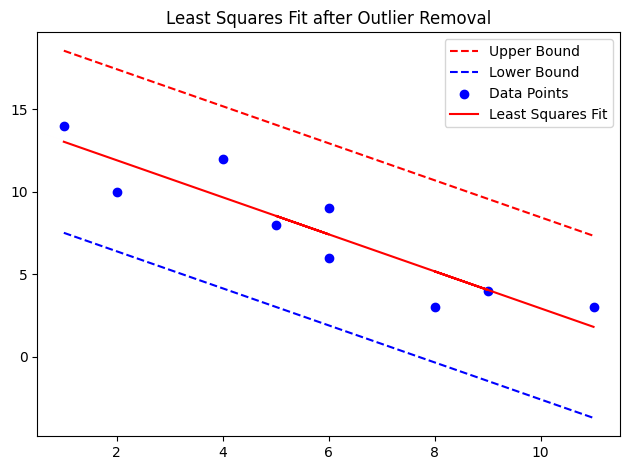

In [4]:
new_x, new_y = dal.remove_outliers(x, y, outliers)
print("Outlier Indices:", outliers)
print("New X Data:", new_x)
print("New Y Data:", new_y)
slope_intercept_new = dal.least_squares_coefficient(np.array(new_x), np.array(new_y))
residual_data_new, mean_of_residual_new, residual_standard_dev_new = dal.calculate_residuals(x, y)

upper_boundy_new, upper_boundx_new, lower_boundx_new, lower_boundy_new = dal.error_bar_bounds(new_x, mean_of_residual_new, residual_standard_dev_new, slope_intercept_new)


plt.plot(upper_boundx_new, upper_boundy_new, color='red', linestyle='dashed', label='Upper Bound')
plt.plot(lower_boundx_new, lower_boundy_new, color='blue', linestyle='dashed', label='Lower Bound')

dal.graph__least_squares(new_x, new_y, title = "Least Squares Fit after Outlier Removal")

plt.legend()
plt.tight_layout()
plt.show()


# 4b

In [5]:
# def RMSE(x_data, y_data):
#     n = len(x_data)
    
#     fit_residual, residual_mean, residual_std = calculate_residuals(x_data, y_data)
    
#     sum_squared_errors = 0.0
#     for residual in fit_residual:
#         sum_squared_errors += residual ** 2
        
#     rmse = np.sqrt(sum_squared_errors / n)
    
#     return rmse

print("RMSE before outlier removal:", dal.RMSE(x, y))
print("RMSE after outlier removal:", dal.RMSE(new_x, new_y))

RMSE before outlier removal: 2.757391785629938
RMSE after outlier removal: 1.5274768669921703
